<a href="https://colab.research.google.com/github/francisofficial/SDG13_CO2_Forecast_Project/blob/main/SDG13_CO2_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# List files in your Drive root (optional)
!ls -la /content/drive/MyDrive | sed -n '1,120p'


Mounted at /content/drive
total 302
-rw------- 1 root root 304426 Oct 23 05:02 CO2 emissions per capita - cleaned - excel.xlsx
drwx------ 2 root root   4096 Oct 20 03:45 Colab Notebooks
-rw------- 1 root root    188 Aug 21 09:57 Provided data for channel.gdoc


In [2]:
import pandas as pd

# Define your file path
file_path = '/content/drive/MyDrive/CO2 emissions per capita - cleaned - excel.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Show the first 5 rows
df.head()


,source:,https://data.worldbank.org/indicator/EN.ATM.CO2E.PC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Country Name,Country Code,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.0,2021.0
1,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,0.936869,0.957668,...,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764,NaN,NaN
3,Afghanistan,AFG,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,0.068979,0.061837,...,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN
4,Africa Western and Central,AFW,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,0.559529,0.544999,...,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN


In [3]:
# Clean the dataset
df_clean = df.drop(0)  # remove the first row (header repetition)
df_clean.columns = df.iloc[0]  # set the first row as column headers
df_clean = df_clean[1:]  # remove the header row from data

# Drop 'Unnamed' columns if any remain
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^Unnamed')]

# Convert year columns to numeric type
for col in df_clean.columns[2:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Show the first few rows again
df_clean.head()


TypeError: bad operand type for unary ~: 'float'

In [4]:
# Step 1: Convert column names to strings
df_clean.columns = df_clean.columns.map(str)

# Step 2: Drop columns with 'Unnamed'
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains('^Unnamed', na=False)]

# Step 3: Convert year columns to numeric (except first two)
for col in df_clean.columns[2:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Step 4: Display cleaned data
df_clean.head()


,Country Name,Country Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,Africa Eastern and Southern,AFE,0.982136,0.937815,0.902599,0.904581,0.906340,0.926339,0.936869,0.957668,...,0.983547,0.995665,1.006938,0.956704,0.938565,0.928508,0.908094,0.903764,NaN,NaN
3,Afghanistan,AFG,0.222538,0.207535,0.115282,0.095689,0.083465,0.075523,0.068979,0.061837,...,0.265210,0.189910,0.149162,0.176278,0.153019,0.134106,0.165455,0.160976,NaN,NaN
4,Africa Western and Central,AFW,0.473669,0.525418,0.563118,0.518770,0.466821,0.497312,0.559529,0.544999,...,0.472242,0.499219,0.506918,0.485478,0.490807,0.474882,0.478305,0.485884,NaN,NaN
5,Angola,AGO,0.554586,0.545439,0.544627,0.710984,0.839398,0.914302,1.073463,1.086668,...,0.947663,1.031093,1.092216,1.125224,1.020760,0.802751,0.766143,0.779203,NaN,NaN
6,Albania,ALB,1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,0.612367,0.466921,...,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,NaN,NaN


In [5]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 2 to 266
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  265 non-null    object 
 1   Country Code  265 non-null    object 
 2   1990.0        233 non-null    float64
 3   1991.0        234 non-null    float64
 4   1992.0        238 non-null    float64
 5   1993.0        238 non-null    float64
 6   1994.0        238 non-null    float64
 7   1995.0        238 non-null    float64
 8   1996.0        238 non-null    float64
 9   1997.0        238 non-null    float64
 10  1998.0        237 non-null    float64
 11  1999.0        237 non-null    float64
 12  2000.0        238 non-null    float64
 13  2001.0        238 non-null    float64
 14  2002.0        239 non-null    float64
 15  2003.0        239 non-null    float64
 16  2004.0        239 non-null    float64
 17  2005.0        239 non-null    float64
 18  2006.0        239 non-null    

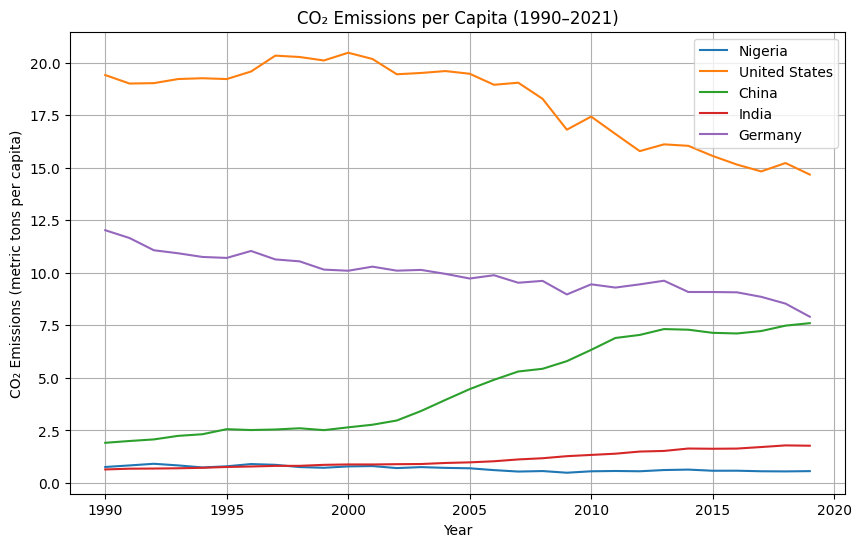

In [6]:
# Select some countries
countries = ['Nigeria', 'United States', 'China', 'India', 'Germany']

# Filter data for these countries
subset = df_clean[df_clean['Country Name'].isin(countries)]

# Transpose years into rows for plotting
subset_melted = subset.melt(id_vars=['Country Name', 'Country Code'],
                            var_name='Year',
                            value_name='CO2_per_capita')

# Convert year to numeric
subset_melted['Year'] = pd.to_numeric(subset_melted['Year'], errors='coerce')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for country in countries:
    country_data = subset_melted[subset_melted['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['CO2_per_capita'], label=country)

plt.title("CO₂ Emissions per Capita (1990–2021)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (metric tons per capita)")
plt.legend()
plt.grid(True)
plt.show()


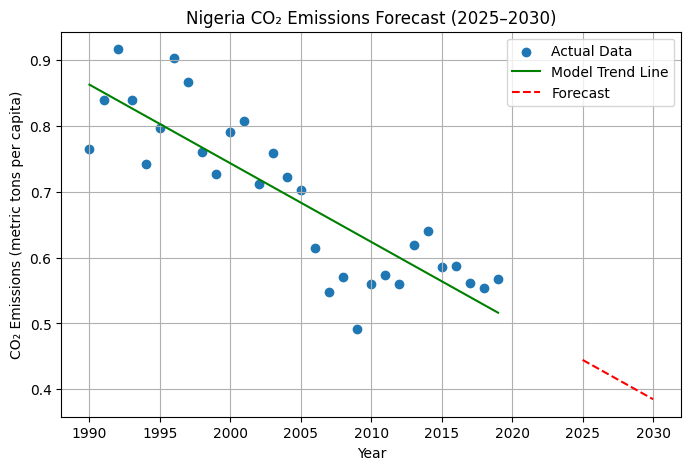

,Year,Predicted_CO2_per_capita
0,2025,0.444538
1,2026,0.432594
2,2027,0.420650
3,2028,0.408705
4,2029,0.396761
5,2030,0.384817


In [7]:
# Filter data for Nigeria
nigeria = df_clean[df_clean['Country Name'] == 'Nigeria'].drop(columns=['Country Code'])

# Transpose so years are rows
nigeria_t = nigeria.melt(id_vars=['Country Name'], var_name='Year', value_name='CO2_per_capita')
nigeria_t['Year'] = pd.to_numeric(nigeria_t['Year'], errors='coerce')

# Drop missing values
nigeria_t = nigeria_t.dropna()

# Prepare features (X) and target (y)
X = nigeria_t[['Year']]
y = nigeria_t['CO2_per_capita']

# Train simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Predict for future years (2025–2030)
future_years = pd.DataFrame({'Year': list(range(2025, 2031))})
future_predictions = model.predict(future_years)

# Combine results
future_df = pd.DataFrame({'Year': future_years['Year'], 'Predicted_CO2_per_capita': future_predictions})

# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Actual Data')
plt.plot(X, model.predict(X), color='green', label='Model Trend Line')
plt.plot(future_df['Year'], future_df['Predicted_CO2_per_capita'], color='red', linestyle='--', label='Forecast')
plt.title('Nigeria CO₂ Emissions Forecast (2025–2030)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (metric tons per capita)')
plt.legend()
plt.grid(True)
plt.show()

# Display prediction table
future_df
